Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your collaborators below:

In [1]:
COLLABORATORS = ""

---

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# special imports for computing mds and dendrograms
from representations import mds, plot_dendrogram

----

## Part A (1 point)

Louis Reasoner thinks that Alyssa's representations of the kinship data using MDS and the dendrogram is pretty cool. He decides to try modeling some different data that he has: similarity judgments of colors. Loading in the data, Louis sees that it has three keys:

In [3]:
color_data = np.load("data/color.npz")
color_data.keys()

['similarities', 'rgba', 'wavelengths']

The array `rgba` corresponds to RGBA (red-green-blue-alpha) color values:

In [4]:
rgba = color_data['rgba']
rgba

array([[ 0.06581168,  0.        ,  1.        ,  1.        ],
       [ 0.        ,  0.27594593,  1.        ,  1.        ],
       [ 0.        ,  0.69975173,  1.        ,  1.        ],
       [ 0.        ,  0.81973916,  1.        ,  1.        ],
       [ 0.        ,  1.        ,  0.61985506,  1.        ],
       [ 0.1012907 ,  1.        ,  0.        ,  1.        ],
       [ 0.63910109,  1.        ,  0.        ,  1.        ],
       [ 0.87217408,  1.        ,  0.        ,  1.        ],
       [ 1.        ,  0.7318658 ,  0.        ,  1.        ],
       [ 1.        ,  0.49517684,  0.        ,  1.        ],
       [ 1.        ,  0.32581067,  0.        ,  1.        ],
       [ 1.        ,  0.        ,  0.        ,  1.        ],
       [ 1.        ,  0.        ,  0.        ,  1.        ],
       [ 1.        ,  0.        ,  0.        ,  1.        ]])

The array `wavelengths` are the nanometer wavelengths corresponding to the RGBA values:

In [5]:
wavelengths = color_data['wavelengths']
wavelengths

array([434, 445, 465, 472, 490, 504, 537, 555, 584, 600, 610, 628, 651, 674])

And finally, the array `similarities` are the similarity judgments:

In [6]:
similarities = color_data['similarities']
similarities

array([[ 1.        ,  0.97816615,  0.87441643,  0.87441643,  0.7517575 ,
         0.59271708,  0.61503268,  0.53402   ,  0.43367667,  0.61503268,
         0.65141417,  0.69306042,  0.70464778,  0.73470666],
       [ 0.97816615,  1.        ,  0.89965667,  0.88115089,  0.78080756,
         0.65141417,  0.61503268,  0.61503268,  0.43367667,  0.53402   ,
         0.61503268,  0.68046423,  0.70464778,  0.71537601],
       [ 0.87441643,  0.89965667,  1.        ,  0.96949501,  0.89069929,
         0.74348297,  0.66666667,  0.63436333,  0.43367667,  0.33333333,
         0.43367667,  0.33333333,  0.56632333,  0.49237375],
       [ 0.87441643,  0.88115089,  0.96949501,  1.        ,  0.91079792,
         0.79931334,  0.66666667,  0.65141417,  0.43367667,  0.33333333,
         0.        ,  0.33333333,  0.43367667,  0.53402   ],
       [ 0.7517575 ,  0.78080756,  0.89069929,  0.91079792,  1.        ,
         0.92844328,  0.8304539 ,  0.80499112,  0.61503268,  0.43367667,
         0.43367667,  0.33

<div class="alert alert-success">Now that you know how MDS and hierarchical clustering work, try to think about how you would expect them to behave on similarity judgments of color. Do you think MDS would be better, or the dendrogram? Justify your answer, and make sure to describe what you think the better representation would look like.</div>

I think MDS would be better for judging the similarities of color because I believe mapping the similarities in a 2D space would make for a much a more efficient similarity judgement instead of stacking them in a hierarchy. This is because I don't think colors really 'inherit' properties from one another or are hierarchically organized. I think the spatial representation would ideally look like a color wheel.

---

## Part B (1 point)

Louis goes ahead and uses the `mds` function to compute the 2D spatial representation of the data:

In [7]:
color_points = mds(similarities)
color_points

array([[-0.56489615,  0.02318126],
       [ 0.54068836,  0.1310427 ],
       [-0.0518383 , -0.43672889],
       [ 0.17954233, -0.18897083],
       [-0.22736302,  0.07485603],
       [ 0.26899173,  0.29581537],
       [-0.23532066,  0.35830725],
       [-0.43587955, -0.14072107],
       [ 0.59472009, -0.12895199],
       [ 0.19592584, -0.51956008],
       [ 0.24015765, -0.05504145],
       [-0.31464749, -0.38838781],
       [ 0.16175451,  0.64028798],
       [-0.32407508,  0.37458408]])

<div class="alert alert-success">However, Louis wasn't paying very close attention to how Alyssa used MDS algorithm, and can't remember how to plot the data. Help Louis visualize the results of running MDS on the color data by plotting the 2D points `color_points`. Label the points with the wavelengths they correspond to using the `axis.text` function (like what you did for the music data in the previous problem). The points should be colored according to the color they correspond to, and should be set to size 100 so they are large enough to see easily. Also, don't forget to give your plot a title! Your solution can be done in 4 lines of code.</div>

_Important Note:_ You should use `axis.scatter` to create your plot, and you should only call it <em>once</em>. However, you can call `plt.text` multiple times. Do not use any other plotting functions.

In [8]:
# get a handle to an axis object, then close the plot
axis = plt.gca()
plt.close()

# look up documentation on axis.scatter
axis.scatter?

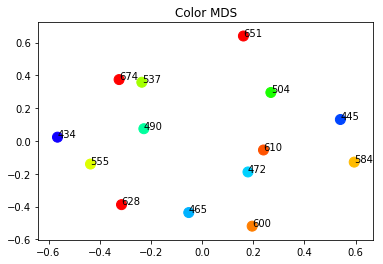

In [9]:
# create the figure
fig, axis = plt.subplots()

# YOUR CODE HERE
n=0
axis.set_title("Color MDS")
axis.scatter([x[0] for x in color_points], [y[1] for y in color_points], s=100, c = [i for i in rgba])
for elem in color_points:
    axis.text(elem[0], elem[1],wavelengths[n])
    n = n+1 

<div class="alert alert-info">Note: If the colors you're seeing after implementing `plot_color_mds` don't seem quite right, don't despair! Read on for a hint on why this might be the case. </div>

In [10]:
"""Check that the color MDS data was correctly plotted."""
from numpy.testing import assert_array_equal
from nose.tools import assert_equal, assert_not_equal
from plotchecker import ScatterPlotChecker

# check that data hasn't changed
cd = np.load("data/color.npz")
assert_array_equal(rgba, cd['rgba'])
assert_array_equal(wavelengths, cd['wavelengths'])
assert_array_equal(similarities, cd['similarities'])
assert_array_equal(color_points, mds(similarities))

# check the correct data was plotted
pc = ScatterPlotChecker(axis)
pc.assert_x_data_equal(color_points[:, 0])
pc.assert_y_data_equal(color_points[:, 1])

# check that the correct size and colors were used
pc.assert_colors_equal(rgba)
pc.assert_sizes_equal(100)

# check that the wavelength labels are correct
pc.assert_textlabels_equal([str(x) for x in wavelengths])
pc.assert_textpoints_equal(color_points)

# check that a title was included
pc.assert_title_exists()

print("Success!")

Success!


---

## Part C (0.5 points)

<div class="alert alert-success">After getting your help to write his code, Louis looks at the resulting plot, and is dismayed to see that the MDS representation of colors doesn't seem to make any sense. Louis goes to Alyssa for help. She takes a look at his code, and tells him that he ran the MDS algorithm on the wrong data. What is wrong with Louis' solution?</div>

What Louis did wrong was input the list of *similarities* into the MDS algorithm, when instead he should have put the list of *dissimilarities* into the MDS because it takes as input pairwise distances. Therefore, if he transforms the similarity list into a dissimilarity list, the distances will be preserved and MDS will work as planned.

<div class="alert alert-success">Once you have figured out what is wrong with Louis' solution, copy and paste your plotting code from above into the following cell. Add a new line that re-runs the MDS algorithm, and plots those new points instead of the old points. Store the new points into a variable called `new_color_points`, and make sure you replace all instances of `color_points` with `new_color_points`. Your solution can be done in 5 lines of code.</div>

_Important Note:_ You should use `axis.scatter` to create your plot, and you should only call it <em>once</em>. However, you can call `plt.text` multiple times. Do not use any other plotting functions.

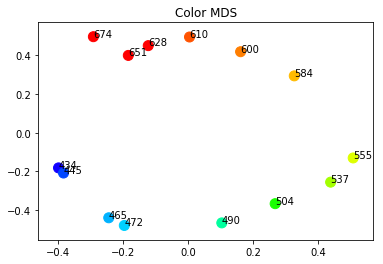

In [11]:
# create the figure
fig, axis = plt.subplots()

# YOUR CODE HERE
## 1 - similarities
new_color_points = mds([1-x for x in similarities])
n=0
axis.set_title("Color MDS")
axis.scatter([x[0] for x in new_color_points], [y[1] for y in new_color_points], s=100, c = [i for i in rgba])
for elem in new_color_points:
    axis.text(elem[0], elem[1],wavelengths[n])
    n = n+1 

After fixing the plot, does it more closely match your intuitions from Part A? (You do not need to write a response to this question, but you should think about the answer).

In [12]:
"""Check that the color MDS data was correctly plotted."""
from numpy.testing import assert_array_equal, assert_allclose
from nose.tools import assert_equal, assert_not_equal
from plotchecker import ScatterPlotChecker

# check that data hasn't changed
cd = np.load("data/color.npz")
assert_array_equal(rgba, cd['rgba'])
assert_array_equal(wavelengths, cd['wavelengths'])
assert_array_equal(similarities, cd['similarities'])
assert_equal(new_color_points.shape, (14, 2))
assert_allclose(new_color_points[0], np.array([-0.39802631, -0.18197825]))
assert_allclose(new_color_points[-1], np.array([-0.29100923,  0.49663493]))

# check the correct data was plotted
pc = ScatterPlotChecker(axis)
pc.assert_x_data_equal(new_color_points[:, 0])
pc.assert_y_data_equal(new_color_points[:, 1])

# check that the correct size and colors were used
pc.assert_colors_equal(rgba)
pc.assert_sizes_equal(100)

# check that the wavelength labels are correct
pc.assert_textlabels_equal([str(x) for x in wavelengths])
pc.assert_textpoints_equal(new_color_points)

# check that a title was included
pc.assert_title_exists()

print("Success!")

Success!


---

## Part D (0.5 points)

<div class="alert alert-success">Louis also wants to try looking at the data with a dendrogram, but again wasn't paying very close attention to what Alyssa did earlier. Help him produce the correct dendrogram plot. Use the same `plot_dendrogram` function that you used on the previous problem, and don't forget to set a title. You should use the wavelengths as your x-axis tick labels. Note that for this exercise, you should use the optional "colors" keyword argument to pass the rgb values to the dendrogram function (this is helpful for visualization). Your answer can be done in 2 lines of code.</div>

[0.065811682861160653, 0.0, 1.0, 1.0]
[0.0, 0.27594593229224296, 1.0, 1.0]
[0.0, 0.69975172732369795, 1.0, 1.0]
[0.0, 0.81973915954895893, 1.0, 1.0]
[0.0, 1.0, 0.61985506115385902, 1.0]
[0.10129069733744248, 1.0, 0.0, 1.0]
[0.63910109412579696, 1.0, 0.0, 1.0]
[0.87217408301313826, 1.0, 0.0, 1.0]
[1.0, 0.73186580466920714, 0.0, 1.0]
[1.0, 0.4951768422652541, 0.0, 1.0]
[1.0, 0.32581066839450723, 0.0, 1.0]
[1.0, 0.0, 0.0, 1.0]
[1.0, 0.0, 0.0, 1.0]
[1.0, 0.0, 0.0, 1.0]


/home/jovyan/problem-sets/ps3/representations.py:75: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if not colors == 'None':


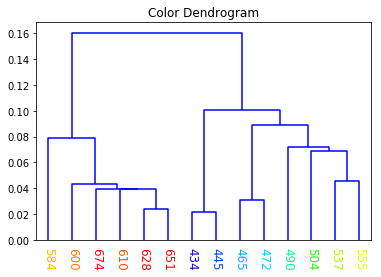

In [13]:
# create the figure
fig, axis = plt.subplots()

# YOUR CODE HERE
for i in rgba:
    print(list(i))

axis.set_title("Color Dendrogram")
dissimilarities = plot_dendrogram(axis, similarities, wavelengths, colors = rgba)

Is this a good representation for the color data? Again, you do not need to write a response to this question, but you should think about the answer.

In [14]:
"""Check that the dendrogram function was correctly used for the kinship data."""
from numpy.testing import assert_array_equal
from nose.tools import assert_equal, assert_not_equal
from plotchecker import PlotChecker

# check that data hasn't changed
cd = np.load("data/color.npz")
assert_array_equal(rgba, cd['rgba'])
assert_array_equal(wavelengths, cd['wavelengths'])
assert_array_equal(similarities, cd['similarities'])

# check that a title was included
pc = PlotChecker(axis)
pc.assert_title_exists()

# check that the labels are correct
labels = sorted([int(x.get_text()) for x in axis.get_xticklabels()])
assert_array_equal(labels, wavelengths, "color labels are incorrect")

# check that the dissimilarities are correct
assert_array_equal(dissimilarities, 1 - similarities, "color dissimilarities are incorrect")

print("Success!")

Success!


---

Before turning this problem in remember to do the following steps:

1. **Restart the kernel** (Kernel$\rightarrow$Restart)
2. **Run all cells** (Cell$\rightarrow$Run All)
3. **Save** (File$\rightarrow$Save and Checkpoint)

<div class="alert alert-danger">After you have completed these three steps, ensure that the following cell has printed "No errors". If it has <b>not</b> printed "No errors", then your code has a bug in it and has thrown an error! Make sure you fix this error before turning in your problem set.</div>

In [15]:
print("No errors!")

No errors!
